## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# setting options to display max rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Read file

In [3]:
df = pd.read_csv("zomato_restaurants_in_India.csv")
df.head(2)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001.0,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1


## Dataset Description

**res_id**: Restaurant ID

**name:** Restaurant name

**establishment:** Type of establishment (e.g., Quick Bites, Casual Dining)

**url:** URL of the restaurant on Zomato

**address:** Restaurant's address
    
**city:** City where the restaurant is located

**latitude, longitude:** Geographical coordinates

**cuisines:** Types of cuisines offered

**average_cost_for_two:** Average cost for two people

**price_range:** Price range category
    
    1: Low cost
    2: Moderate cost
    3: High cost
    4: Very high cost
                        
**currency:** Currency used

**highlights:** Key features or services of the restaurant

**aggregate_rating:** Average rating

**rating_text:** Textual rating (e.g., Excellent, Very Good)

**votes:** Number of votes for the rating

**photo_count:** Number of photos available

**opentable_support:** Indication if OpenTable support is available

**delivery, takeaway:** Delivery and takeaway options

     1: Yes
     0: Not specified
    -1: No

## Analyze the structure of the data

In [4]:
df.shape

(211944, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [6]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


# Data Cleaning and Preparation:
   
   
#### ● Identify and handle missing values.
    
    

In [7]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [8]:
df.isnull().sum().sum()

168634

In [9]:
# Calculate the number of missing values for each column
missing_values = df.isnull().sum()

# Display columns with missing values and their respective counts
missing_values[ df.isnull().sum() > 0]


address                 134
zipcode              163187
cuisines               1391
timings                3874
opentable_support        48
dtype: int64

#### Ways to Handle Missing values 

        1. Using Mode to fill the missing with frequent occuring address
        2. Fill forward
        3. Replace with placeholder like unknown
        4. If values are less, then remove those rows with missing value
        5. If column is not necesarry for Analysis, then drop the column

**1. Address**


Strategy:

For the "address" column, you may choose to drop rows with missing addresses if having an address is crucial for your analysis. Alternatively, if the missing values are minimal and you want to keep those rows, you can replace the missing values with a placeholder like "Unknown" or use the mode (most frequent address) to fill in the missing values.

In [10]:
# Option 1: Drop rows with missing addresses
#df = df.dropna(subset=['address'])

# Option 2: Replace missing values with 'Unknown'
#df['address'].fillna('Unknown', inplace=True)


In [11]:
df = df.drop(columns=['address'])

**Zipcode**

Given that a large proportion of the "zipcode" column is missing (approximately 77% of the total rows), simply filling in missing values with the mode of zip codes in the same city might not be the most suitable approach. Instead, you might consider the following strategy:

Dropping the 'zipcode' Column

In [12]:
df = df.drop(columns=['zipcode'])

**Cuisines**

Strategy:
For the "cuisines" column, you might replace missing values with a default cuisine or the most frequent cuisine. Or you can drop it if it is not necessary for analysis.


In [13]:
df['cuisines'].mode()[0]

'North Indian'

In [14]:
df['cuisines'].isnull().sum()

1391

In [15]:
most_frequent_cuisine = df['cuisines'].mode()[0]
df['cuisines'].fillna(most_frequent_cuisine, inplace=True)
df['cuisines'].isnull().sum()

0

In [16]:
#df = df.drop(columns=['cuisines'])

In [17]:
# Calculate the number of missing values for each column
missing_values = df.isnull().sum()

# Display columns with missing values and their respective counts
missing_values[ df.isnull().sum() > 0]


timings              3874
opentable_support      48
dtype: int64

**Timings**

Strategy:
For the "timings" column,it consist of different standards data not the uniform standard form. You can simply drop it if it is not necessary.

In [18]:
# Replace missing values in 'timings' with a default value or the most common timing
default_timing = 'Not Available'
df['timings'].fillna(default_timing, inplace=True)
df.dropna(subset=['timings'], inplace=True)


In [19]:
#df = df.drop(columns=['timings'])

**Opentable_support**

Strategy:
For the "opentable_support" column, Forward fill missing values in the 'Opentable_support' column

In [20]:
df['opentable_support'].value_counts()

opentable_support
0.0    211896
Name: count, dtype: int64

In [21]:
df['opentable_support'].fillna(method='ffill', inplace=True)

In [22]:
df['opentable_support'].isnull().sum()

0

In [23]:
df = df.drop(columns=['opentable_support'])

In [24]:
# Calculate the number of missing values for each column
missing_values = df.isnull().sum()

# Display columns with missing values and their respective counts
missing_values[ df.isnull().sum() > 0]


Series([], dtype: int64)

In [25]:
df.isnull().sum().sum()

0

In [26]:
df.shape

(211944, 23)

#### ●  Detect and correct any inconsistencies in the dataset (e.g., data types, mislabeled categories).



**Explore Datatypes**

In [27]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
delivery                  int64
takeaway                  int64
dtype: object

**Explore inconsistencies in the dataset**


In [28]:
for column in df.select_dtypes(include='object').columns:
    print("Column"," ",column,"  uniquevalue are :", df[column].nunique())
    print(df[column].unique())
    print("-------------------------")


Column   name   uniquevalue are : 41100
['Bikanervala' 'Mama Chicken Mama Franky House' 'Bhagat Halwai' ...
 'Red China' 'Wah Ustad' 'Geeta lodge']
-------------------------
Column   establishment   uniquevalue are : 27
["['Quick Bites']" "['Casual Dining']" "['Bakery']" "['Café']" "['Dhaba']"
 "['Bhojanalya']" "['Bar']" "['Sweet Shop']" "['Fine Dining']"
 "['Food Truck']" "['Dessert Parlour']" "['Lounge']" "['Pub']"
 "['Beverage Shop']" "['Kiosk']" "['Paan Shop']" "['Confectionery']" '[]'
 "['Shack']" "['Club']" "['Food Court']" "['Mess']" "['Butcher Shop']"
 "['Microbrewery']" "['Cocktail Bar']" "['Pop up']" "['Irani Cafe']"]
-------------------------
Column   url   uniquevalue are : 55568
['https://www.zomato.com/agra/bikanervala-khandari?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1'
 'https://www.zomato.com/agra/mama-chicken-mama-franky-house-agra-cantt?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1'
 'https://www.zomato.com/agra/bhagat-halwai-2-shahganj?u

#### Corrections:
    1. Identify mislabeled categories or inconsistent naming.
    2. Standardize category names or merge similar categories.

**Column: Timing**

In [29]:
df[['opening_hours','closing_hours']] = 'NaN'

In [30]:
df[['timings', 'opening_hours', 'closing_hours']].head()

,timings,opening_hours,closing_hours
0,8:30am – 10:30pm (Mon-Sun),NaN,NaN
1,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",NaN,NaN
2,9:30 AM to 11 PM,NaN,NaN
3,8am – 11pm (Mon-Sun),NaN,NaN
4,11:30 AM to 11:30 PM,NaN,NaN


In [31]:
import pandas as pd
import re


def extract_hours(row):
    if pd.isna(row['timings']):
        return row['opening_hours'], row['closing_hours']

    timings_str = str(row['timings'])

    # First pattern
    match_first = re.match(r'(\d+:\d+\w{0,2}) – (\d+:\d+\w{0,2})', timings_str)
    if match_first:
        return match_first.group(1), match_first.group(2)

    # Second pattern
    match_second = re.match(r'(\d{1,2}:\d{2}).*?(\d{1,2})', timings_str)
    if match_second:
        return match_second.group(1), match_second.group(2)

    # Third pattern
    match_third = re.match(r'(\d{1,2}).*?(\d{1,2})', timings_str)
    if match_third:
        return match_third.group(1), match_third.group(2)

    return row['opening_hours'], row['closing_hours']

# Apply the custom function to the DataFrame
df[['opening_hours', 'closing_hours']] = df.apply(extract_hours, axis=1, result_type='expand')

df['opening_hours'] = df['opening_hours'].str.replace(r'[apAP][mM]', '', regex=True)
df['closing_hours'] = df['closing_hours'].str.replace(r'[apAP][mM]', '', regex=True)

# Display the DataFrame with the extracted opening_hours and closing_hours
df[['timings', 'opening_hours', 'closing_hours']].head()


,timings,opening_hours,closing_hours
0,8:30am – 10:30pm (Mon-Sun),8:30,10:30
1,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",12:30,12
2,9:30 AM to 11 PM,9:30,11
3,8am – 11pm (Mon-Sun),8,11
4,11:30 AM to 11:30 PM,11:30,11


**Column: establishment**

It appears that the "establishment" column contains lists of strings instead of individual strings. Converting the lists to a string.

In [32]:
df['establishment'].value_counts().head(5)

establishment
['Quick Bites']        64390
['Casual Dining']      61808
['Café']               22760
['Bakery']              8282
['Dessert Parlour']     7961
Name: count, dtype: int64

In [33]:
import ast

# Assuming 'df' is your DataFrame
df['establishment'] = df['establishment'].apply(lambda x: ast.literal_eval(x)[0] if (isinstance(x, str) and ast.literal_eval(x)) else x)


In [34]:
df['establishment'].value_counts().head(5)

establishment
Quick Bites        64390
Casual Dining      61808
Café               22760
Bakery              8282
Dessert Parlour     7961
Name: count, dtype: int64

**Column: url**

The "url" column contains unique URLs for each entry. This column might not be necessary for your analysis, and you could drop it.


In [35]:
df = df.drop(columns=['url'])

**Column: Highlights**

The "Highlights" column contains different tags that might not be necessary for your analysis, and you could drop it.


In [36]:
df = df.drop(columns=['highlights'])


**Column: rating_text**

The "rating_text" column contains text-based ratings.
Consider converting these ratings to a numerical scale for analysis.

In [37]:
df['rating_text'].value_counts().head(5)

rating_text
Very Good    65451
Good         63384
Average      42157
Not rated    23478
Excellent    15737
Name: count, dtype: int64

In [38]:
# Convert text-based ratings to a numerical scale
rating_mapping = {'Not rated': 0, 'Poor': 1, 'Average': 2, 'Good': 3, 'Very Good': 4, 'Excellent': 5}
df['rating_numeric'] = df['rating_text'].map(rating_mapping)


In [39]:
df[['rating_text','rating_numeric']].value_counts()

rating_text  rating_numeric
Very Good    4.0               65451
Good         3.0               63384
Average      2.0               42157
Not rated    0.0               23478
Excellent    5.0               15737
Poor         1.0                1175
Name: count, dtype: int64

**Takeaway**

Drop this column as it has same value througout

In [40]:
df['takeaway'].value_counts()

takeaway
-1    211944
Name: count, dtype: int64

In [41]:
df = df.drop(columns=['takeaway'])

**Country ID**

Drop this column as it has same value througout

In [42]:
df['country_id'].value_counts()

country_id
1    211944
Name: count, dtype: int64

In [43]:
df = df.drop(columns=['country_id'])

 **Duplicates**

In [44]:
df.shape

(211944, 22)

In [45]:
df.duplicated().sum()

151737

In [46]:
df[df.duplicated() == True].head(2)

,res_id,name,establishment,city,city_id,locality,latitude,longitude,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,aggregate_rating,rating_text,votes,photo_count,delivery,opening_hours,closing_hours,rating_numeric
101,3400059,Peshawri - ITC Mughal,Fine Dining,Agra,34,"ITC Mughal, Tajganj",27.161150,78.043993,"ITC Mughal, Tajganj, Agra","North Indian, Mughlai","12:30 PM to 2:45 PM, 7 PM to 11:45 PM",6000,4,Rs.,4.4,Very Good,353,154,-1,12:30,2,4.0
116,3400060,Taj Bano - ITC Mughal,Fine Dining,Agra,34,"ITC Mughal, Tajganj",27.161132,78.044022,"ITC Mughal, Tajganj, Agra","Mughlai, North Indian","6 AM to 10:30 AM, 12:30 PM to 2:30 PM, 7 PM to...",2500,4,Rs.,4.3,Very Good,96,205,-1,6,10,4.0


In [47]:
df = df.drop_duplicates()

In [48]:
df.shape

(60207, 22)

In [49]:
df[df.duplicated() == True].head(2)

,res_id,name,establishment,city,city_id,locality,latitude,longitude,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,aggregate_rating,rating_text,votes,photo_count,delivery,opening_hours,closing_hours,rating_numeric


In [50]:
df.duplicated().sum()

0

#### Save the cleaned data

In [51]:
df.to_csv("Preprocessed_data.csv",index = False)

## Exploratory Data Analysis:

#### ● Descriptive Statistics: Summarize the central tendency, dispersion, and shape of the dataset's distribution.
    

In [52]:
df = pd.read_csv("Preprocessed_data.csv")

In [53]:
df.head(2)

,res_id,name,establishment,city,city_id,locality,latitude,longitude,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,aggregate_rating,rating_text,votes,photo_count,delivery,opening_hours,closing_hours,rating_numeric
0,3400299,Bikanervala,Quick Bites,Agra,34,Khandari,27.211450,78.002381,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,4.4,Very Good,814,154,-1,8:30,10:30,4.0
1,3400005,Mama Chicken Mama Franky House,Quick Bites,Agra,34,Agra Cantt,27.160569,78.011583,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,4.4,Very Good,1203,161,-1,12:30,12,4.0


In [54]:
df.shape

(60207, 22)

In [55]:
df.describe(include='all')

,res_id,name,establishment,city,city_id,locality,latitude,longitude,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,aggregate_rating,rating_text,votes,photo_count,delivery,opening_hours,closing_hours,rating_numeric
count,6.020700e+04,60207,60207,60207,60207.000000,60207,60207.000000,60207.000000,60207,60207,60207,60207.000000,60207.000000,60207,60207.000000,60207,60207.000000,60207.000000,60207.000000,58299,58299,59669.000000
unique,NaN,41100,27,99,NaN,3731,NaN,NaN,3910,9382,7741,NaN,NaN,1,NaN,39,NaN,NaN,NaN,111,72,NaN
top,NaN,Domino's Pizza,Quick Bites,Chennai,NaN,Civil Lines,NaN,NaN,"Gomti Nagar, Lucknow",North Indian,11 AM to 11 PM,NaN,NaN,Rs.,NaN,Good,NaN,NaN,NaN,11,11,NaN
freq,NaN,404,15443,2576,NaN,803,NaN,NaN,312,5051,7670,NaN,NaN,60207,NaN,17538,NaN,NaN,NaN,17291,23608,NaN
mean,1.309811e+07,NaN,NaN,NaN,3427.016892,NaN,21.350230,76.588296,NaN,NaN,NaN,535.891574,1.727606,NaN,3.028987,NaN,256.644277,188.582673,-0.371651,NaN,NaN,2.467110
std,8.129906e+06,NaN,NaN,NaN,5183.080447,NaN,41.258406,10.616980,NaN,NaN,NaN,591.407885,0.878538,NaN,1.441244,NaN,717.658342,682.234590,0.925307,NaN,NaN,1.383584
min,5.000000e+01,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,NaN,-18.000000,0.000000,-1.000000,NaN,NaN,0.000000
25%,3.000628e+06,NaN,NaN,NaN,7.000000,NaN,16.317954,74.748123,NaN,NaN,NaN,200.000000,1.000000,NaN,2.900000,NaN,7.000000,1.000000,-1.000000,NaN,NaN,2.000000
50%,1.869181e+07,NaN,NaN,NaN,26.000000,NaN,22.321114,77.135473,NaN,NaN,NaN,400.000000,1.000000,NaN,3.500000,NaN,41.000000,11.000000,-1.000000,NaN,NaN,3.000000
75%,1.886702e+07,NaN,NaN,NaN,11295.000000,NaN,26.743924,79.927126,NaN,NaN,NaN,600.000000,2.000000,NaN,3.900000,NaN,204.000000,80.000000,1.000000,NaN,NaN,3.000000


####  Outliers


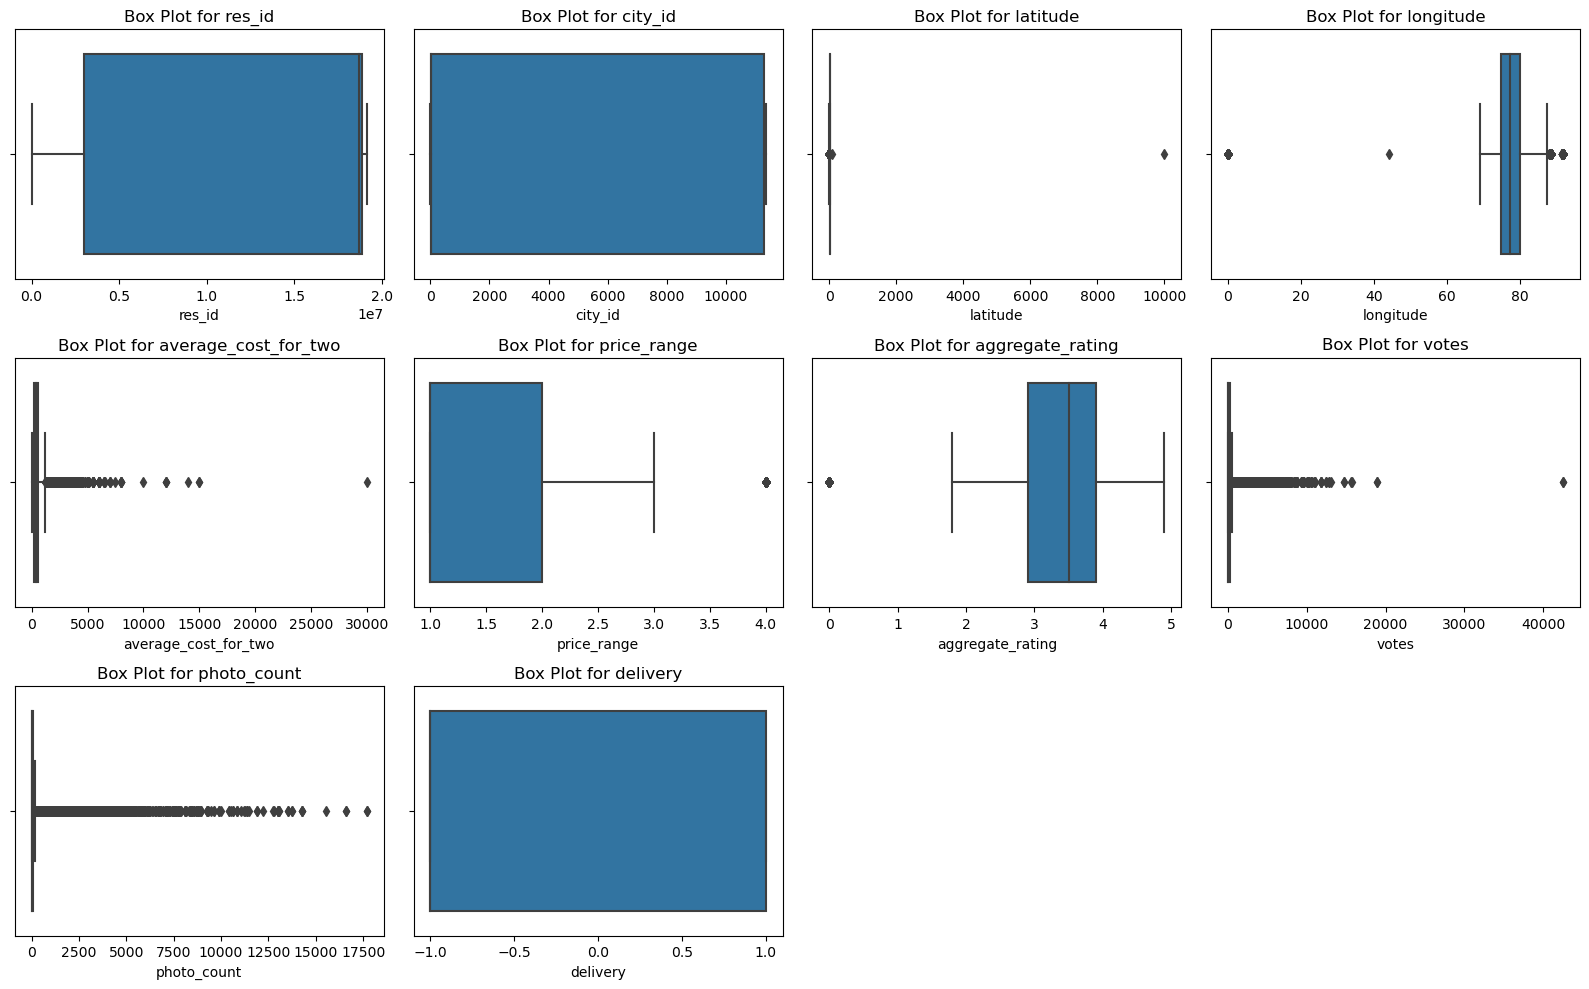

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to include in box plots
columns_of_interest = ['res_id', 'city_id', 'latitude', 'longitude',
                        'average_cost_for_two', 'price_range', 'aggregate_rating',
                        'votes', 'photo_count', 'delivery']

# Subset the DataFrame with selected columns
selected_columns_df = df[columns_of_interest]

# Create box plots for selected columns
plt.figure(figsize=(16, 10))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(3, 4, i)  # Adjust subplot layout based on the number of selected columns
    sns.boxplot(x=selected_columns_df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [57]:
from scipy import stats

# Columns to include in outlier analysis
columns_of_interest = ['res_id', 'city_id', 'latitude', 'longitude',
                        'average_cost_for_two', 'price_range', 'aggregate_rating',
                        'votes', 'photo_count', 'delivery', 'rating_numeric']

# Subset the DataFrame with selected columns
selected_columns_df = df[columns_of_interest]

# Dictionary to store outlier counts for each column
outlier_counts = {}

# Function to count outliers using Z-score
def count_outliers(column):
    z_scores = stats.zscore(selected_columns_df[column])
    outliers = (abs(z_scores) > 3)
    outlier_count = sum(outliers)
    return outlier_count

# Count outliers for each column
for column in columns_of_interest:
    outlier_counts[column] = count_outliers(column)

# Display outlier counts
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")


Outlier Counts:
res_id: 0 outliers
city_id: 0 outliers
latitude: 1 outliers
longitude: 957 outliers
average_cost_for_two: 1073 outliers
price_range: 0 outliers
aggregate_rating: 0 outliers
votes: 1027 outliers
photo_count: 1088 outliers
delivery: 0 outliers
rating_numeric: 0 outliers


#### Distribution Analysis: Analyze the distribution of key variables (e.g., ratings, price range).


The **rating distribution** shows a multimodal pattern, with significant peaks around 3.0 and 4.0. A noticeable concentration of ratings in the range of 3.0 to 4.0 indicates that most restaurants have ratings within this range. The
distribution also shows a left skew, with fewer restaurants having deficient ratings (close to 0).


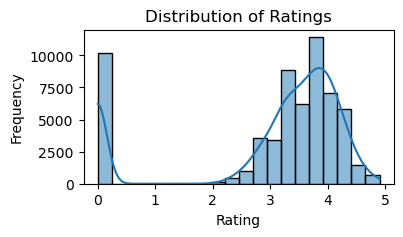

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 2))

sns.histplot(df['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


**Price Range Distribution:**
The price range distribution is skewed towards the lower end, with most restaurants falling in lower prices (1 and 2).
There is a noticeable decline in frequency as the price range increases, indicating that higher-priced restaurants are less common in the dataset.

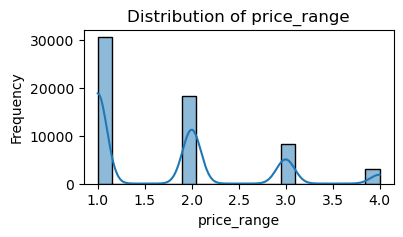

In [59]:
plt.figure(figsize=(4, 2))

sns.histplot(df['price_range'], bins=20, kde=True)
plt.title('Distribution of price_range')
plt.xlabel('price_range')
plt.ylabel('Frequency')
plt.show()

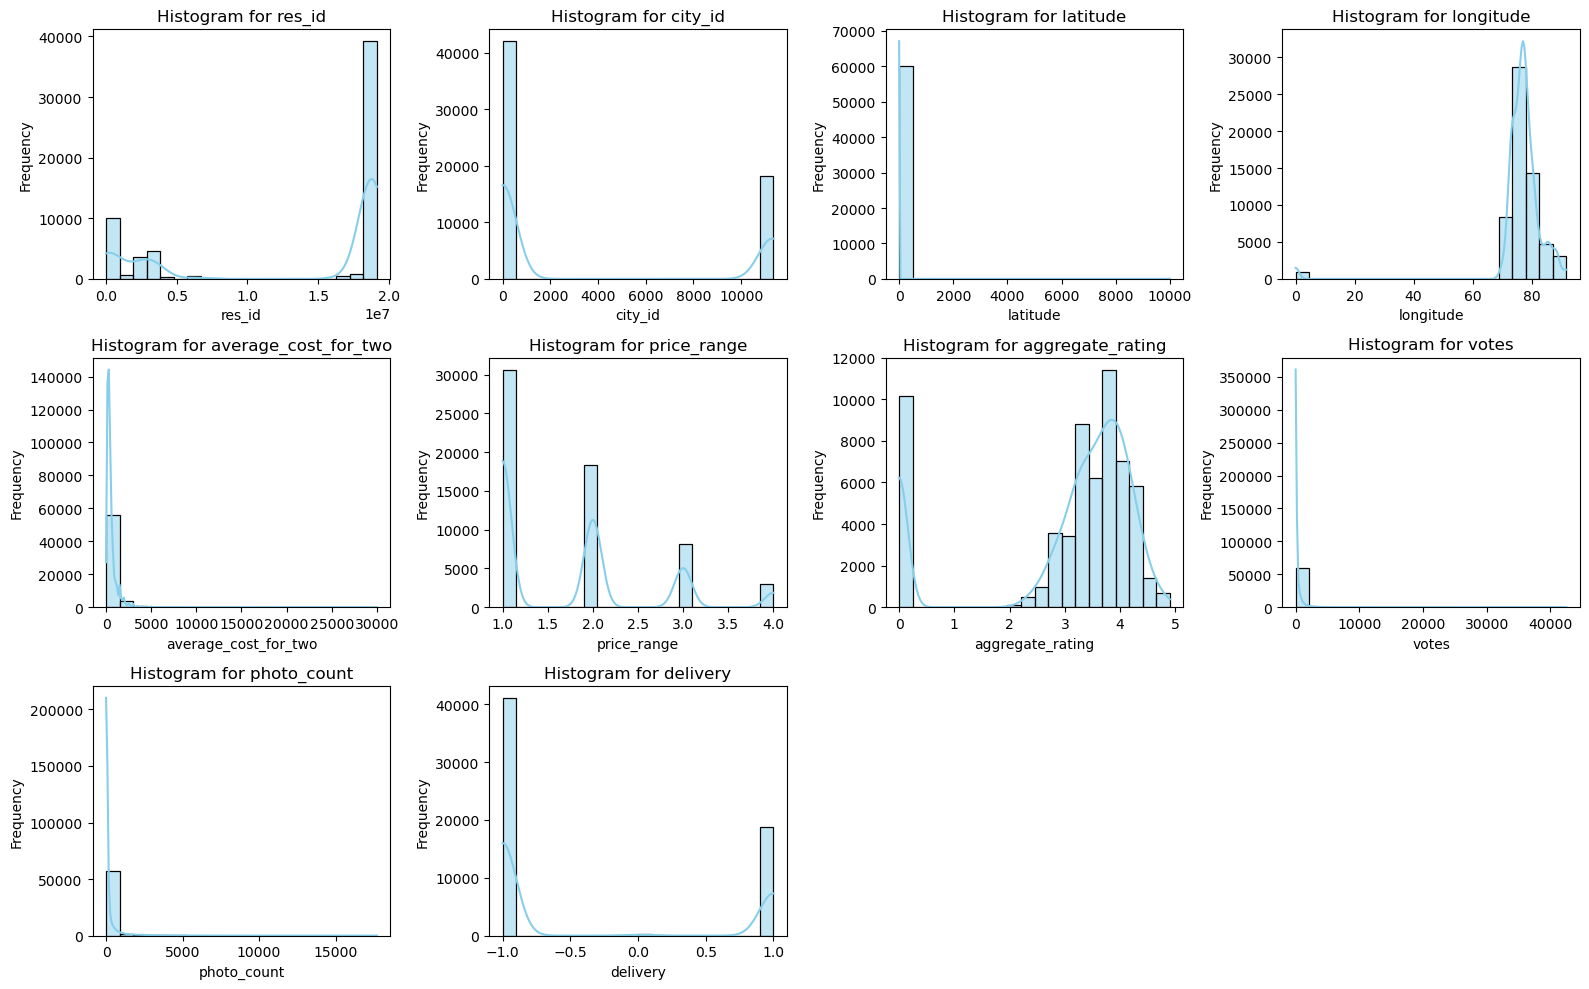

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
columns_of_interest = ['res_id', 'city_id', 'latitude', 'longitude',
                        'average_cost_for_two', 'price_range', 'aggregate_rating',
                        'votes', 'photo_count', 'delivery']

plt.figure(figsize=(16, 10))

for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(3, 4, i)  # Adjust subplot layout based on the number of selected columns
    sns.histplot(df[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


    ● Correlation Analysis: Examine the relationships between different variables.


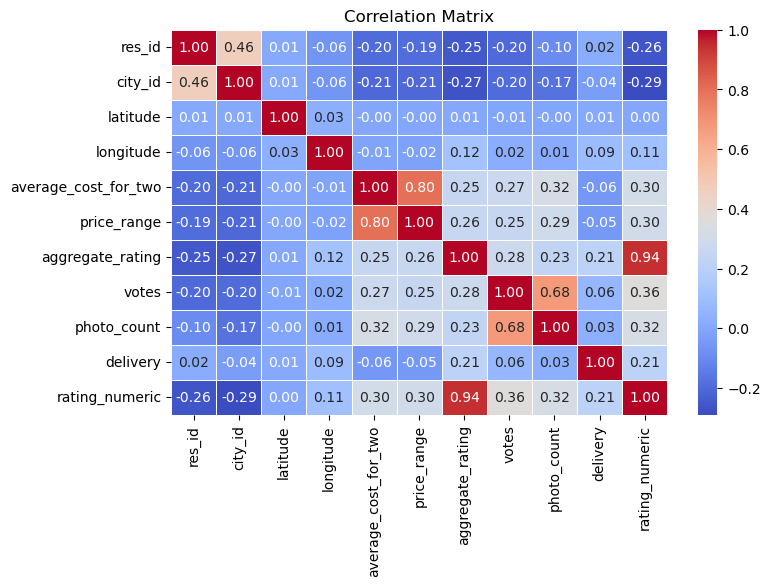

In [61]:
import seaborn as sns

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


## Regional Analysis:

#### ● Compare the restaurant trends and customer preferences across different cities or regions in India.


**City with most restaurants**

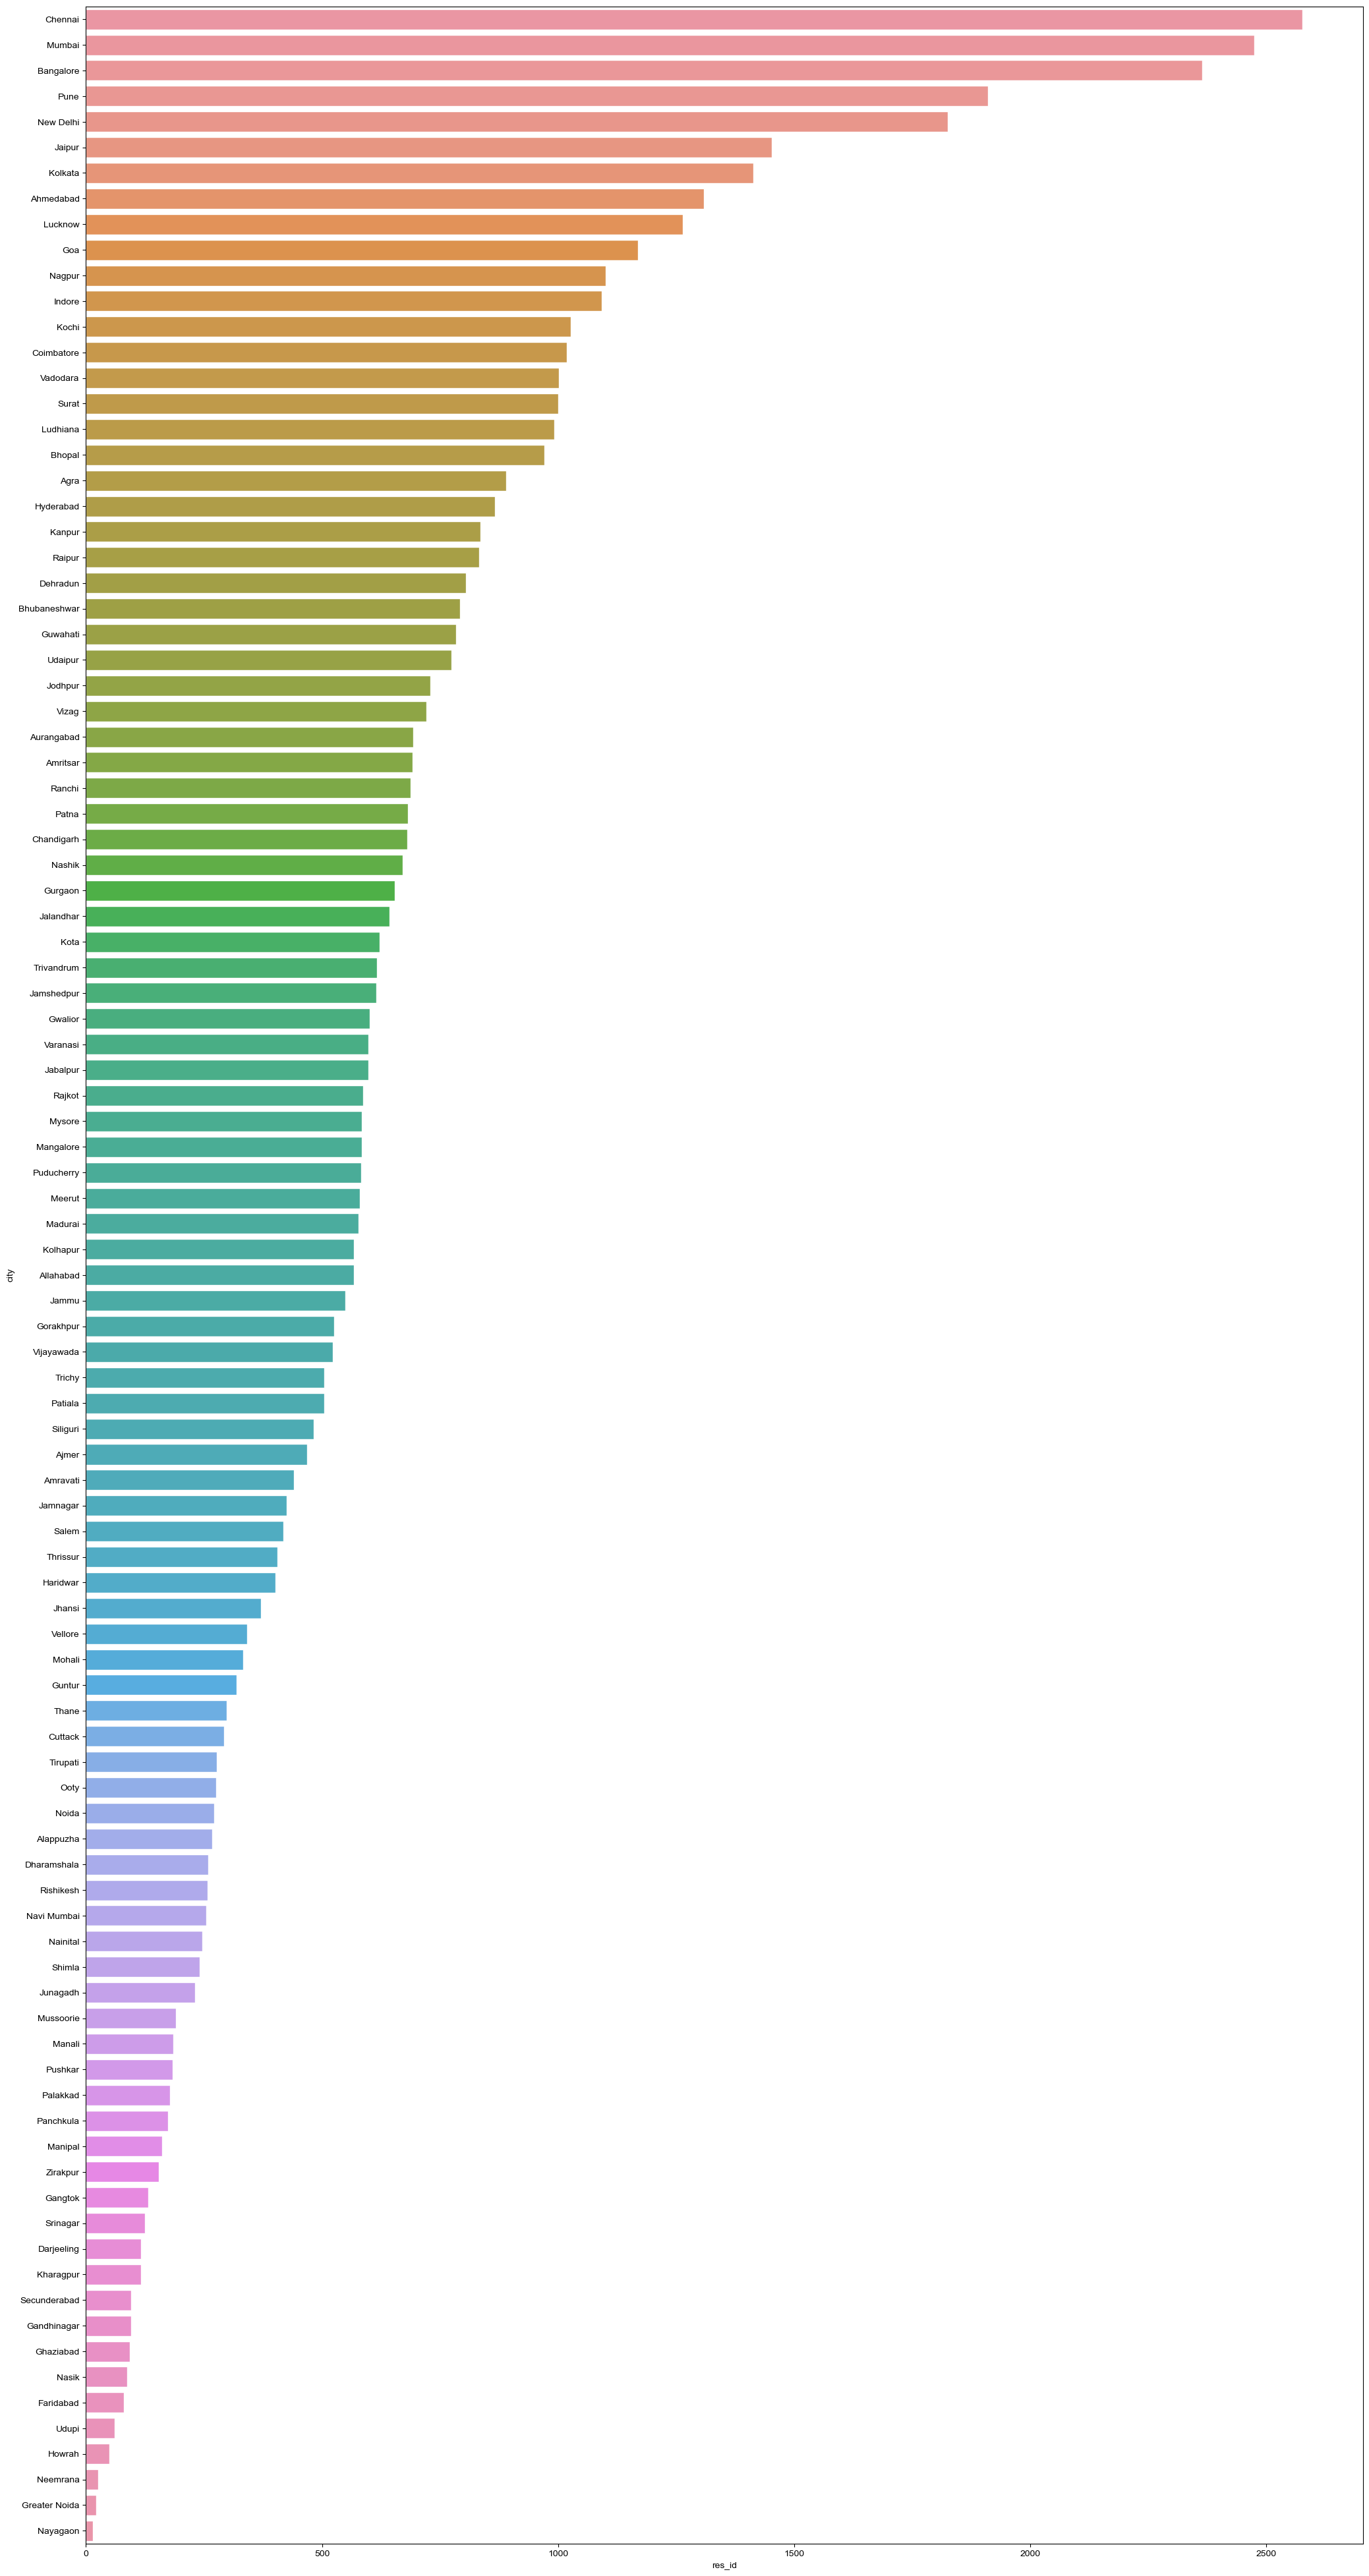

In [62]:
city_df = df.loc[:,['res_id','city']]
res_by_city = city_df.groupby('city').count()
res_by_city.sort_values('res_id',ascending=False,inplace=True)
fig,axes =  plt.subplots()
fig.set_size_inches(25,50)
sns.set_style('ticks')
plt.rcParams.update({'font.size': 25,'axes.labelsize':30})
res_by_city_plot = sns.barplot(x='res_id',y=res_by_city.index,data=res_by_city,ax=axes)

In [63]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': plt.rcParamsDefault['font.size'], 'axes.labelsize': plt.rcParamsDefault['axes.labelsize']})


**Top 5 Cities by Average Rating**

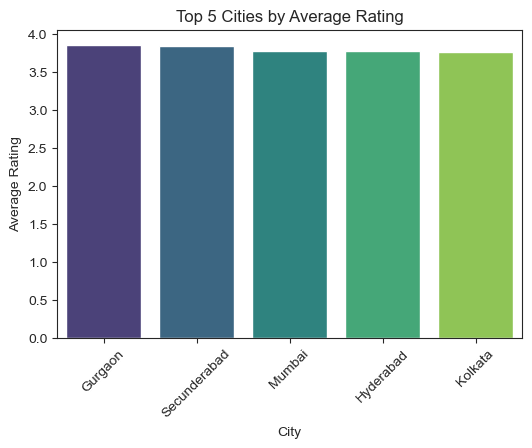

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate average rating for each city
average_rating_by_city = df.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False)

# Select the top 5 cities
top_5_cities = average_rating_by_city.head(5)

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette="viridis")
plt.title('Top 5 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


**Customer Preference Analysis**

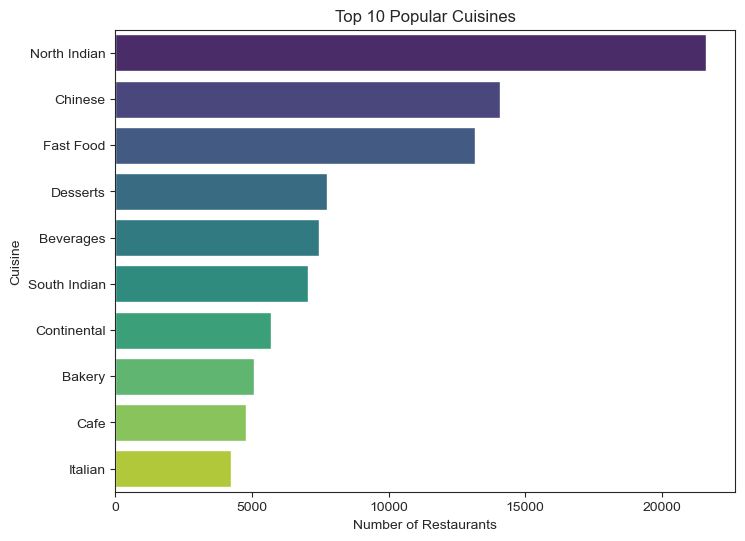

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
top_cuisines = df['cuisines'].str.split(', ', expand=True).stack().value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


**Top 10 Restaurants by rating**

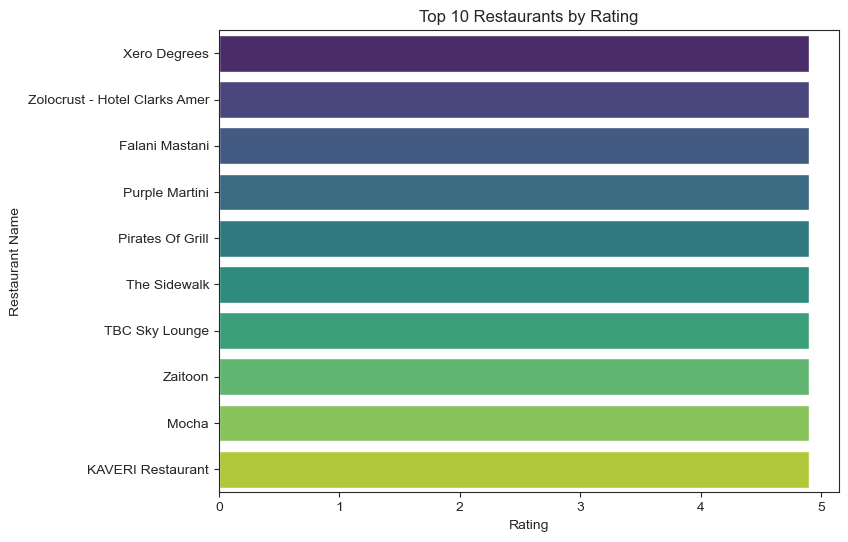

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Sort the DataFrame by rating in descending order and select the top 10 restaurants
top_10_restaurants = df.sort_values(by='aggregate_rating', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='aggregate_rating', y='name', data=top_10_restaurants, palette="viridis")
plt.title('Top 10 Restaurants by Rating')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.show()


**Average Rating by Price Range**

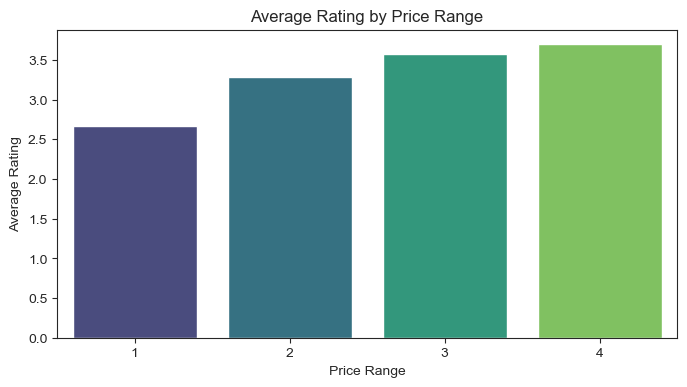

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Create a bar chart for Average Rating by Price Range
plt.figure(figsize=(8, 4))
sns.barplot(x='price_range', y='aggregate_rating', data=df, ci=None, palette="viridis")
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()


**Average Rating by Delivery Availability**

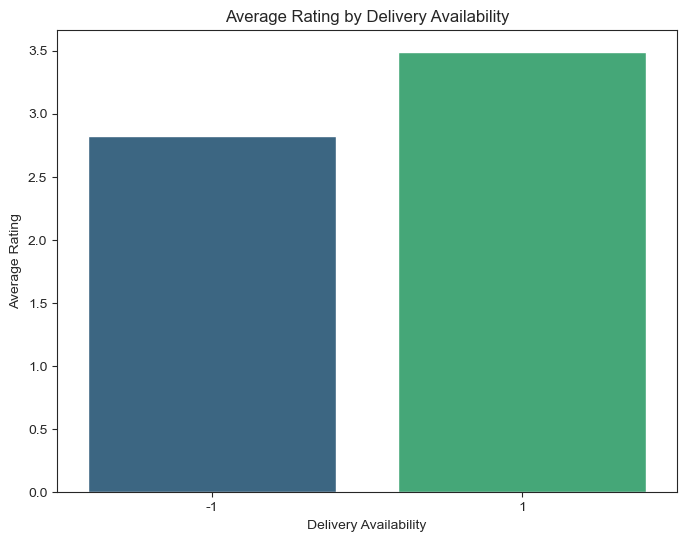

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Exclude rows with 'delivery' value equal to 0
df_filtered = df[df['delivery'] != 0]

# Create a bar chart for Average Rating by Delivery Availability
plt.figure(figsize=(8, 6))
sns.barplot(x='delivery', y='aggregate_rating', data=df_filtered, ci=None, palette="viridis")
plt.title('Average Rating by Delivery Availability')
plt.xlabel('Delivery Availability')
plt.ylabel('Average Rating')
plt.show()


### COMPETITIVE ANALYSIS

**Top 10 Competitors by Restaurant Count**

name
Domino's Pizza     404
Cafe Coffee Day    322
KFC                261
Subway             211
Keventers          208
Baskin Robbins     207
McDonald's         155
Pizza Hut          149
Burger King        143
Barbeque Nation    118
Name: count, dtype: int64


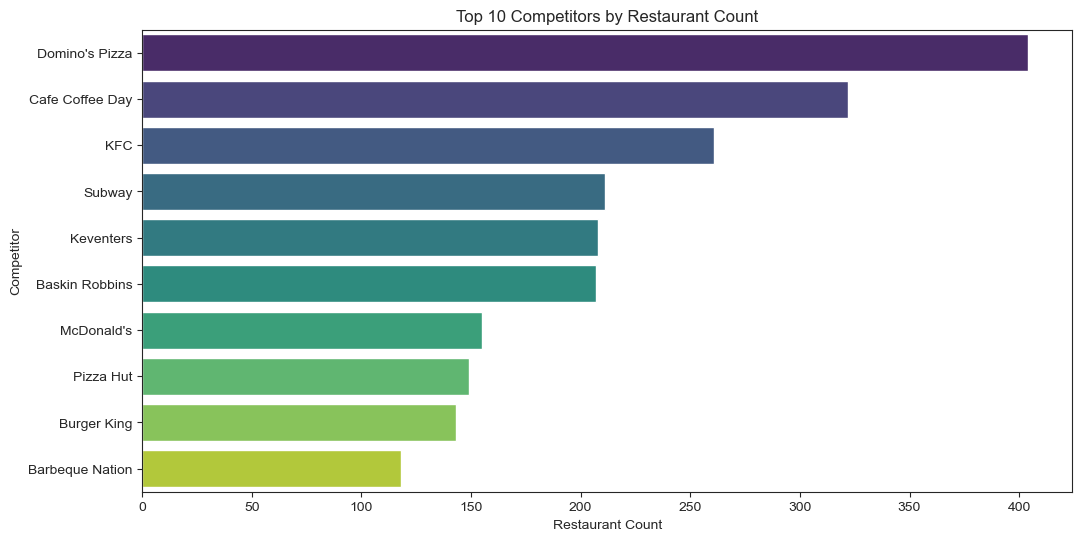

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of restaurants for each competitor
competitor_counts = df['name'].value_counts().head(10)
print(competitor_counts)
# Create a bar chart for Top 10 Competitors by Restaurant Count
plt.figure(figsize=(12, 6))
sns.barplot(x=competitor_counts.values, y=competitor_counts.index, palette="viridis")
plt.title('Top 10 Competitors by Restaurant Count')
plt.xlabel('Restaurant Count')
plt.ylabel('Competitor')
plt.show()


**Explore Price Range Gaps**

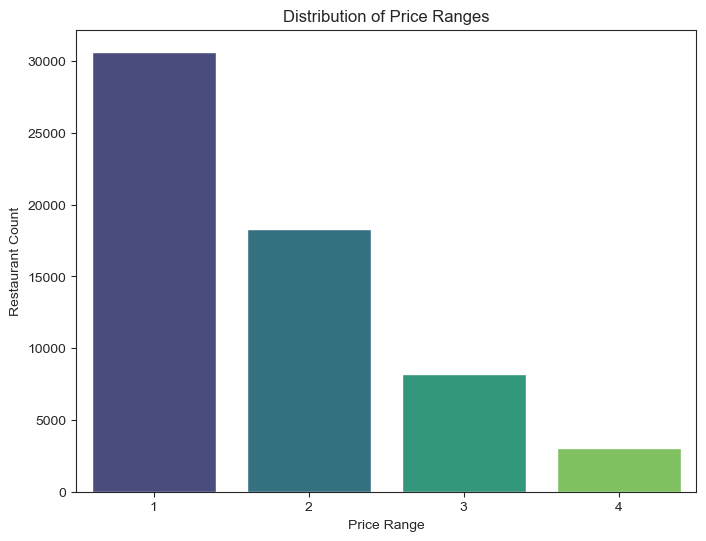

In [70]:
# Visualize the distribution of price ranges
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=df, palette='viridis')
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Restaurant Count')
plt.show()
